A simple solution  to https://www.kaggle.com/c/UKYCS460g2018sinkhole.

If you would like to make a submission from this notebook, you can follow the instructions here https://www.kaggle.com/dansbecker/submitting-from-a-kernel.  Alternatively, you might want to use https://github.com/Kaggle/kaggle-api.

In [58]:
# Paul Barrett

### IMPORTANT NOTE ###
# You may receive the following error:
# ERROR: Number of features of the model must match the input. Model n_features is 10 and input n_features is 11
# The code still works: to fix, re-run all cells in the notebook and try to run the cell again

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np

#classifiers/etc
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

### Load and describe data ###

In [59]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.head())

   ID  Shape_Length   Shape_Area  Depth_MAX  Dept_MEAN  Depth_STD   Depth_SUM  \
0   0    124.333136   589.421583   2.279907   1.143903   0.505252   27.453674   
1   1    397.009446  9258.123522   1.553589   1.005807   0.284526  369.131287   
2   2    355.199940  2817.106555   1.891174   0.967558   0.394756  110.301575   
3   3    407.131297  5864.385594   0.807129   0.634363   0.084275  147.172302   
4   4    319.443869  6105.382828   0.959839   0.926346   0.116863  224.175720   

   RingSlopeMEAN  RingSlopeSTD  DepthIndex  Compactness  IsSinkhole  
0       5.479808      3.896399    0.166459     0.230049           0  
1       3.334356      1.028575    0.028621     0.409859           0  
2       6.487078      5.700402    0.063159     0.168495           0  
3       2.974559      1.525622    0.018682     0.229310           0  
4       6.941503      3.420101    0.021774     0.513000           0  


### Visualize Data ###

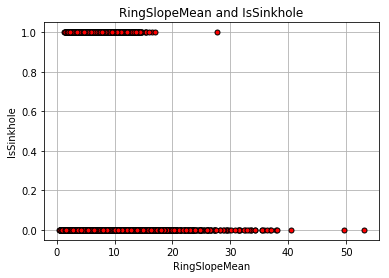

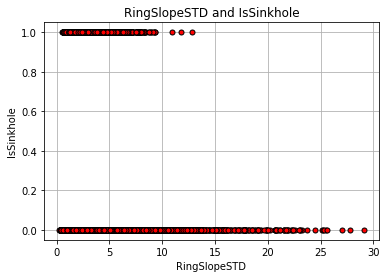

In [60]:
X = train.RingSlopeMEAN.values.reshape(-1,1)
X1 = train.RingSlopeSTD.values.reshape(-1,1)
Y = train.IsSinkhole.values.reshape(-1,1)

fig1, ax = plt.subplots()
ax.plot(X, Y, 'ro', ms=5, mec='k')
ax.set(xlabel='RingSlopeMean', ylabel='IsSinkhole',
       title='RingSlopeMean and IsSinkhole')
ax.grid()


fig2, ay = plt.subplots()
ay.plot(X1, Y, 'ro', ms = 5, mec = 'k')
ay.set(xlabel='RingSlopeSTD', ylabel='IsSinkhole',
       title='RingSlopeSTD and IsSinkhole')
ay.grid()



#### Split Data for Param Search

In [61]:
X=train.drop(columns=['ID','IsSinkhole'])
y=train.IsSinkhole

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

## Find Best Params (Rand Forests) ##

In [62]:
#Using Grid Search

#### ATTEMPTS: ####
# Set the parameters by cross-validation
# took too long - wouldnt ever load
#tuned_parameters = [{'n_estimators': [5, 10, 100, 500, 1000], 'criterion': ['gini', 'entropy'], 'max_depth': 
                    #[None, 2, 4, 8, 16], 'bootstrap': [True, False], 'random_state': [None, 1]}]

# f1 .88: bstrap false, crit entropy, max depth none, n est 100, rand state 1
#tuned_parameters = [{'n_estimators': [5, 10, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 4], 
                    #'bootstrap': [True, False], 'random_state': [None, 1]}]

# no signifigant change, try new n est
#tuned_parameters = [{'n_estimators': [50, 100, 150], 'criterion': ['entropy'], 'max_depth': [None], 'bootstrap': 
                    #[True, False], 'random_state': [1]}]

#class weight none, f1 .88
#tuned_parameters = [{'n_estimators': [100], 'criterion': ['entropy'], 'max_depth': [None], 'bootstrap': [False], 
                    #'random_state': [1], 'class_weight': ['balanced', 'balanced_subsample', None]}]

#barebones approach? .87
tuned_parameters = [{}]

# n = 100, f1 .88
#tuned_parameters = [{'n_estimators': [100, 90, 110]}]

#Do grid search and print classification report
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)
print("Best params: ", clf.best_params_); print()
y_true, y_pred = y_test, clf.predict(X_test)
print("Classification report: "); print()
print(classification_report(y_true, y_pred))

Best params:  {}

Classification report: 

             precision    recall  f1-score   support

          0       0.89      0.95      0.92      6799
          1       0.81      0.66      0.73      2353

avg / total       0.87      0.87      0.87      9152



## Find Best Params (Decision Tree)

In [63]:
#Using Grid Search

#### ATTEMPTS: ####

# barebones approach .83
# tuned_parameters = [{}]

# entropy, 8, f1 .86
#tuned_parameters = [{'criterion': ['entropy', 'gini'], 'max_depth': [None, 2, 8, 16]}]

# 8, rand enabled
#tuned_parameters = [{'criterion': ['entropy'], 'max_depth': [8, 10, 6], 'random_state': [None, 1]}]

# class weight none, f1 .86
tuned_parameters = [{'criterion': ['entropy'], 'max_depth': [8], 'random_state': [1], 'class_weight': ['balanced', None]}]

#Do grid search and print classification report
clf = GridSearchCV(tree.DecisionTreeClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)
print("Best params: ", clf.best_params_); print()
y_true, y_pred = y_test, clf.predict(X_test)
print("Classification report: "); print()
print(classification_report(y_true, y_pred))

bestparamDTree = clf.best_params_

Best params:  {'class_weight': None, 'criterion': 'entropy', 'max_depth': 8, 'random_state': 1}

Classification report: 

             precision    recall  f1-score   support

          0       0.89      0.93      0.91      6799
          1       0.76      0.66      0.71      2353

avg / total       0.86      0.86      0.86      9152



## Find Best Params (Multi Layered Perceptron)

In [64]:
#Using Grid Search

#### ATTEMPTS: ####
# barebones,  f1 .76
tuned_parameters = [{}]

# f1 .63, adaptive sgd not a good idea, iter 200
#tuned_parameters = [{'solver': ['sgd'], 'learning_rate': ['adaptive'], 'max_iter': [200, 300, 100]}]

# 
#tuned_parameters = [{'solver': ['lbfgs'], 'alpha': [1e-5, 1e-6], 'hidden_layer_sizes': [(5, 2)], 'random_state': [1]}]


#Do grid search and print classification report
clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)
print("Best params: ", clf.best_params_); print()
y_true, y_pred = y_test, clf.predict(X_test)
print("Classification report: "); print()
print(classification_report(y_true, y_pred))

Best params:  {}

Classification report: 

             precision    recall  f1-score   support

          0       0.74      1.00      0.85      6799
          1       0.43      0.00      0.01      2353

avg / total       0.66      0.74      0.64      9152



# Decision Tree Classifier

In [68]:
### decision tree ###

print("Using parameters obtained from Grid Search: ")
print(bestparamDTree)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)
clf.fit(X, y)

#### predict and output to csv file ####
predictions = clf.predict(test.drop(columns=['ID']),)
test['IsSinkhole'] = predictions
test.to_csv('d8_decision_tree.csv',index_label='ID',columns=['IsSinkhole'])

Using parameters obtained from Grid Search: 
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 8, 'random_state': 1}


ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 11 

# Random Forest Classifier

In [ ]:
### random forest ###
#make_classification actually seems to make things worse
#X, y = make_classification(n_samples=train.shape[0], n_features=11)#, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
#clf = RandomForestClassifier()
#clf.fit(X, y)
#print(clf.get_params())
### find which features are important ###
"""importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for clf in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
#graph feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()"""

# Multi Layered Perceptron

In [ ]:
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X, y)